In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# download datasets from repository
!wget https://github.com/Raihan2503/capstone-ml/raw/main/kain-tapis.zip

--2023-12-18 13:00:48--  https://github.com/Raihan2503/capstone-ml/raw/main/kain-tapis.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Raihan2503/capstone-ml/main/kain-tapis.zip [following]
--2023-12-18 13:00:48--  https://raw.githubusercontent.com/Raihan2503/capstone-ml/main/kain-tapis.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34662027 (33M) [application/zip]
Saving to: ‘kain-tapis.zip’

kain-tapis.zip      100%[===================>]  33.06M  --.-KB/s    in 0.1s    

2023-12-18 13:00:50 (308 MB/s) - ‘kain-tapis.zip’ saved [34662027/34662027]



In [3]:
import zipfile
local_zip = 'kain-tapis.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [42]:
train_dir = './kain-tapis'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(240, 240),
    batch_size=147,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(240, 240),
    batch_size=97,
    class_mode='sparse',
    subset='validation'
)

Found 1479 images belonging to 7 classes.
Found 979 images belonging to 7 classes.


In [54]:
def model():
  model = keras.models.Sequential([
      keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(240, 240, 3)),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(32, (3,3), activation='relu'),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(64, (3,3), activation='relu'),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      # keras.layers.Dropout(0.2),
      keras.layers.Dense(7, activation='softmax')
  ])

  model.summary()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=1
  )

  return model

In [55]:
history = model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 238, 238, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 119, 119, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 117, 117, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 58, 58, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 28, 28, 64)       

# Testing Model

Saving 94.jpg to 94.jpg
1/1 [==============================] - 0s 19ms/step
94.jpg
jung sarat


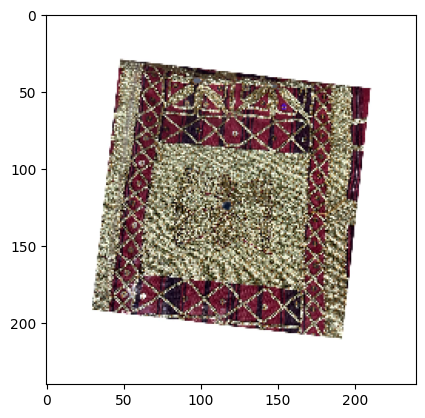

In [81]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(240,240))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = history.predict(images, batch_size=10)

  print(fn)
  if (classes[0][0] == 1) :
    print("antik")
  elif (classes[0][1] == 1) :
    print("jung sarat")
  elif (classes[0][2] == 1) :
    print("lasem")
  elif (classes[0][3] == 1) :
    print("Lauk handak")
  elif (classes[0][4] == 1) :
    print("lima sekebar")
  elif (classes[0][5] == 1) :
    print("mata kibau")
  elif (classes[0][6] == 1) :
    print("pucuk rebung")

# Save Model

In [72]:
history.save('model_deploy.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
